Overall, scatters should be close to the dotted line nominal=surrogate, printed numbers should all be zero. If the tests pass, I'm pretty sure Polyfit is working.

Test fitting from h5, output to npz

In [1]:
from polyfit import Polyfit
import matplotlib.pyplot as plt

dummy_fits = Polyfit('dummy_p_coeffs.npz', 'dummy_chi2res.npz', input_h5='inputdata.h5', order=3, cov_npz = 'dummy_cov.npz')
test_surrogate, chi2_ndf, res, cov = dummy_fits.get_surrogate_func('/func0#0')
test_surrogate2, chi2_ndf2, res2, cov2= dummy_fits.get_surrogate_func(1)

X,Y = dummy_fits.get_XY('/func0#0')
fig, ax = plt.subplots()
plt.scatter(Y, test_surrogate(X))
plt.title('func0#0')
plt.xlabel('surrogate')
plt.ylabel('nominal')
ax.autoscale(tight=True)
xlim = ax.get_xlim()
plt.plot(xlim, xlim, 'k--')

plt.figure()
X1,Y1 = dummy_fits.get_XY('/func0#1')
fig, ax = plt.subplots()
plt.scatter(Y1, test_surrogate2(X))
plt.title('func0#1')
plt.xlabel('surrogate')
plt.ylabel('nominal')
ax.autoscale(tight=True)
xlim = ax.get_xlim()
plt.plot(xlim, xlim, 'k--')


['/func0#0', '/func0#1', '/func0#2', '/func0#3', '/func0#4', '/func0#5', '/func0#6', '/func0#7', '/func0#8', '/func0#9', '/func0#10', '/func0#11', '/func0#12', '/func0#13', '/func0#14', '/func0#15', '/func0#16', '/func0#17', '/func0#18', '/func0#19', '/func1#0', '/func1#1', '/func1#2', '/func1#3', '/func1#4', '/func1#5', '/func1#6', '/func1#7', '/func1#8', '/func1#9', '/func1#10', '/func1#11', '/func1#12', '/func1#13', '/func1#14', '/func1#15', '/func1#16', '/func1#17', '/func1#18', '/func1#19']
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


TypeError: list indices must be integers or slices, not str

Test loading from file, uses X,Y from above to test loaded surrogate

(40, 10)
0.0
[0.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


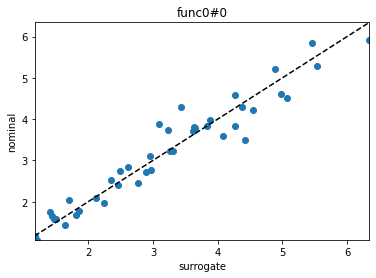

In [ ]:
from polyfit import Polyfit
import matplotlib.pyplot as plt

dummy_fits = Polyfit('dummy_pceoffs.npz', 'dummy_chi2res.npz', cov_npz = 'dummy_cov.npz')
test_surrogate3, chi2_ndf_3, res3, cov3 = dummy_fits.get_surrogate_func('/func0#0')

print(chi2_ndf-chi2_ndf_3)
print(res-res3)
print(cov-cov3)

fig, ax = plt.subplots()
plt.scatter(Y, test_surrogate(X))
plt.title('func0#0')
plt.xlabel('surrogate')
plt.ylabel('nominal')
ax.autoscale(tight=True)
xlim = ax.get_xlim()
plt.plot(xlim, xlim, 'k--')